In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

In [40]:
wikitext2 = np.array([16432.74609375, 22.7473, 12.9361, 5.472])
c4 = [2265.09, 26.126, 17.332, 7.263]
methods = ['GPTQ', 'QuIP', 'FrameQuant', 'FP16']


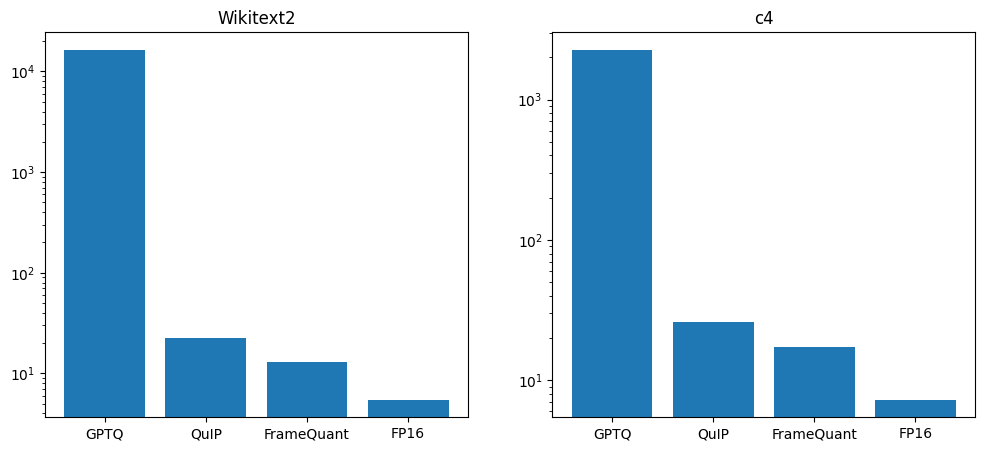

In [41]:
fig, ax = plt.subplots(1,2,squeeze=False, figsize=(12,5))
ax[0,0].bar(methods,wikitext2)
ax[0,0].set_yscale('log')
ax[0,0].set_title('Wikitext2')

ax[0,1].bar(methods,c4)
ax[0,1].set_yscale('log')
ax[0,1].set_title('c4')

plt.show()

In [7]:
OPT_sizes = [125e6,	350e6,	1.3e9,	2.7e9,	6.7e9]
OPT_sizes = [i / 1e9 for i in OPT_sizes]
wikitext2 = {
    'GPTQ'			    : [5718.438965, 14780.43848, 8900.991211, 9173.28906, 3090.293213], 
    'QuIP'			    : [913.0303345, 1028.640381, 37.59546661, 22.8658733, 15.67397976], 
    'FrameQuant 1x'		: [345.7648621, 247.2104797, 30.54358482, 20.6702823, 15.72402287], 
    'FrameQuant 1.1x'	: [131.2833405, 59.12369919, 22.68571854, 15.8629446, 13.53851509], 
    'FrameQuant 1.2x'	: [91.68762207, 50.36276627, 19.85887718, 15.5083456, 13.12802124]
}

PTB = {
    'GPTQ'			    : [4203.123047, 13366.3916, 8169.348145, 7912.742188, 3403.510498], 
    'QuIP'			    : [1080.798218, 1773.66101, 53.14532089, 31.61868286, 23.26093292], 
    'FrameQuant 1x'		: [581.1602173, 266.140899, 41.8896904 , 30.57845497, 22.49379539], 
    'FrameQuant 1.1x'	: [206.995285 , 85.3328018, 32.97537613, 23.76114464, 19.94165421], 
    'FrameQuant 1.2x'	: [119.7598648, 68.6181564, 28.46438217, 22.66833496, 19.20162392]

}

C4 = {
    'GPTQ'			    : [2203.897705, 5325.65918, 4139.913574, 4058.415771, 528.4151], 
    'QuIP'			    : [543.635437 , 432.565033, 28.91544914, 21.49104881, 16.92436],
    'FrameQuant 1x'		: [226.1511536, 95.3829116, 27.90516281, 20.7426548 , 17.28221], 
    'FrameQuant 1.1x'	: [91.29110718, 47.6228065, 22.39648247, 17.75164413, 15.33896], 
    'FrameQuant 1.2x'	: [77.26701355, 41.7419357, 21.05994415, 17.23905563, 14.86173]
}

ls = {
	'GPTQ'              : {'color': '#9198f6', 'marker': '^', 'ls': 'dotted', 'lw': 2, 'ms': 12}, 
	'QuIP'              : {'color': '#b5d0ee', 'marker': 's', 'ls': 'dashed', 'lw': 2, 'ms': 12},  
	'FrameQuant 1x'     : {'color': '#ffbcaf', 'marker': 'X', 'ls': (0, (3, 5, 1, 5)), 'lw': 2, 'ms': 12},  
	'FrameQuant 1.1x'   : {'color': '#93003a', 'marker': 'D', 'ls': (0, (1, 1)), 'lw': 2, 'ms': 12},
	'FrameQuant 1.2x'   : {'color': '#695cfc', 'marker': 'h', 'ls': (0, (3, 1, 1, 1, 1, 1)), 'lw': 2, 'ms': 12},

}

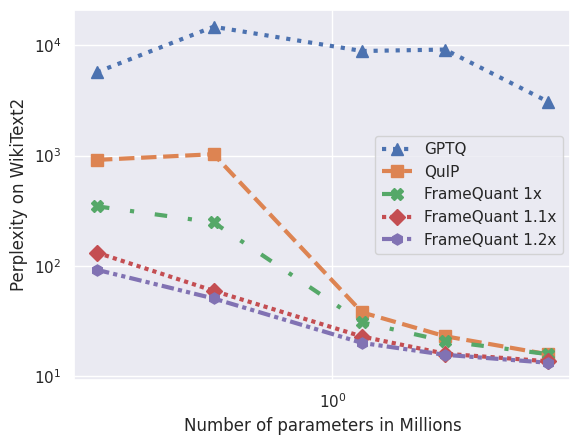

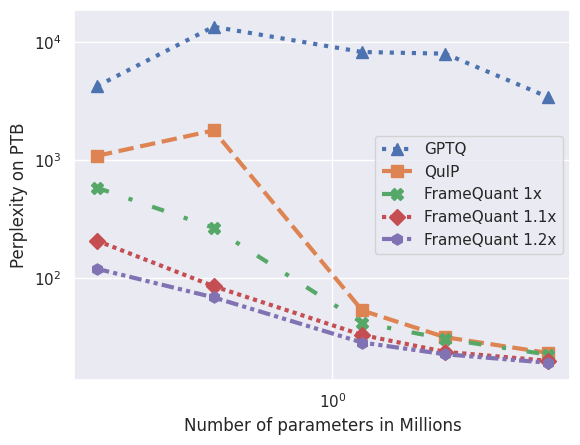

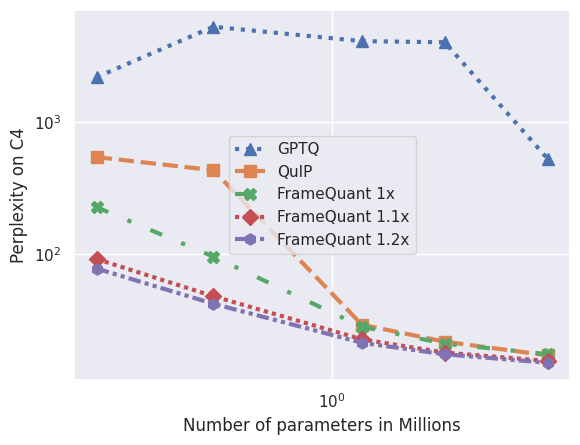

In [8]:
i,j=0,0
for k,v in wikitext2.items():
    plt.loglog(OPT_sizes, wikitext2[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(wikitext2.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on WikiText2')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

i,j=0,0
for k,v in PTB.items():
    plt.loglog(OPT_sizes, PTB[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(PTB.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on PTB')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

i,j=0,0
for k,v in C4.items():
    plt.loglog(OPT_sizes, C4[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(C4.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on C4')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

In [2]:
ViT_params = [5.71,	22.05,	38.861,	86.56,	304.32,	632.04]
ViT_data = {
	'PTQ4ViT': [0.0033, 0.0055, 0.0022, 0.004, 0.375, 0.0018],
    'Full Precision': [0.7546,	0.8139,	0.8445,	0.851,	0.8584,	0.8759],
	'GPTQ': [0.0022,	0.004,	0.153,	0.2926,	0.6308,	0.4263],
	'QuIP': [0.0156,	0.2633,	0.7102,	0.7779,	0.8222,	0.8458],
	'QuIP 2sigma': [0.0932,	0.5028,	0.7621,	0.7961,	0.8317,	0.8531],
	'FrameQuant': [0.1018,	0.481,	0.7581,	0.7953,	0.8322,	0.8549],
	'FrameQuant 1.1': [0.2499,	0.6151,	0.7855,	0.8093,	0.8367,	0.8599], 
}

DeiT_params = [22.05,	38.84,	86.58,	304.37,	632.12]
DeiT_data = {
	'PTQ4ViT': [0.0151, 0.045, 0.2554, 0.0214, 0.55572],
    'Full Precision': [0.8306,	0.8456,	0.857	,0.8697	,0.8719],
	'GPTQ': [0.0045,	0.0082,	0.085	,0.6843	,0.282],
	'QuIP': [0.2698,	0.4484,	0.7226,	0.8476,	0.8627],
	'QuIP 2sigma': [0.5329,	0.6428,	0.7738,	0.8548,	0.8638],
	'FrameQuant': [0.5113,	0.6298,	0.7799,	0.8545,	0.8662],
	'FrameQuant 1.1': [0.6533,	0.7291,	0.8091,	0.8575,	0.8668], 
}

Swin_params = [28.28,	49.6,	87.76,	196.53]
Swin_data = {
	'PTQ4ViT': [0.1254, 0.0015, 0.0015, None],
    'Full Precision': [0.7977, 	0.8279,	0.847,	0.8595],
	'GPTQ': [0.145,	    0.4354,	0.4738,	0.7169],
	'QuIP': [0.6045, 	0.7481,	0.7694,	0.8361],
	'QuIP 2sigma': [0.689,	    0.7766,	0.8002,	0.8427],
	'FrameQuant': [0.697,	    0.7791,	0.8016,	0.8425],
	'FrameQuant 1.1': [0.7253, 	0.7877,	0.8133,	0.8442], 
}

ls = {
    'PTQ4ViT': {'color': '#0000ff', 'marker': '+', 'ls': (0, (1, 10)), 'lw': 2, 'ms': 12},
    'Full Precision': {'color': '#0000ff', 'marker': 'o', 'ls': 'solid', 'lw': 2, 'ms': 12},
	'GPTQ': {'color': '#9198f6', 'marker': '^', 'ls': 'dotted', 'lw': 2, 'ms': 12}, 
	'QuIP': {'color': '#b5d0ee', 'marker': 's', 'ls': 'dashed', 'lw': 2, 'ms': 12},  
	'QuIP 2sigma': {'color': '#ffbcaf', 'marker': 'X', 'ls': (0, (3, 5, 1, 5)), 'lw': 2, 'ms': 12},  
	'FrameQuant': {'color': '#93003a', 'marker': 'D', 'ls': (0, (1, 1)), 'lw': 2, 'ms': 12},
	'FrameQuant 1.1': {'color': '#695cfc', 'marker': 'h', 'ls': (0, (3, 1, 1, 1, 1, 1)), 'lw': 2, 'ms': 12},

}

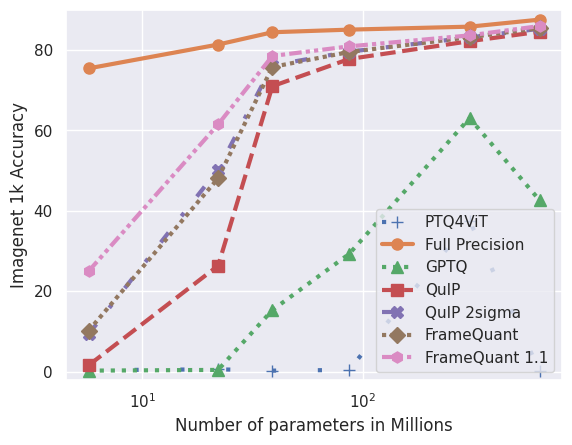

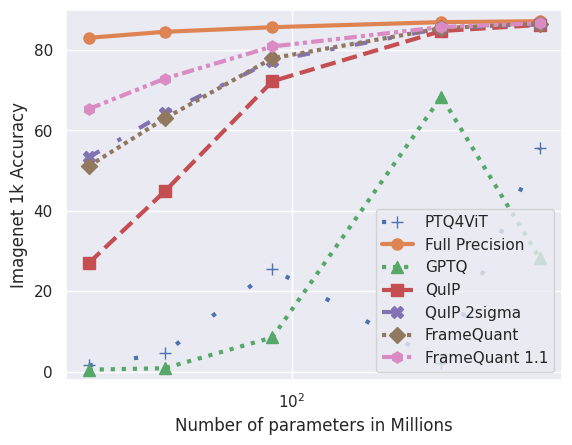

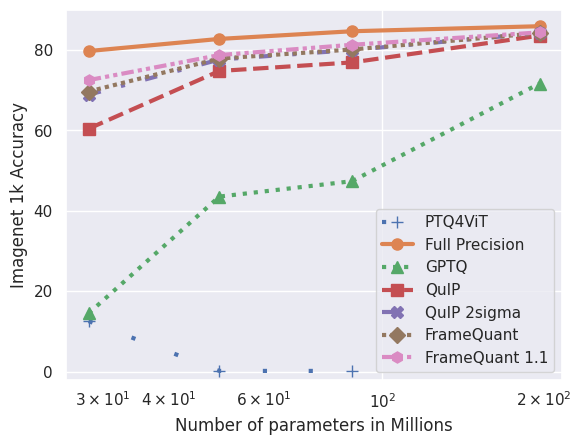

In [4]:

i,j=0,0
for k,v in ViT_data.items():
    acc = [x * 100 for x in v]
    plt.semilogx(ViT_params, acc,marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(ViT_data.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()


i,j=0,1
for k,v in DeiT_data.items():
    acc = [x * 100 for x in v]
    plt.semilogx(DeiT_params, acc, marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(DeiT_data.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('deit_val_accs.pdf', bbox_inches='tight')
plt.show()

i,j=0,2
for k,v in Swin_data.items():
    acc = [x * 100 if x is not None else None for x in v]
    plt.semilogx(Swin_params, acc, marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(Swin_data.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('swin_val_accs.pdf', bbox_inches='tight')
plt.show()

### Plots Vs redundancy

In [4]:
r = [1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30]
smalls = {
            'ViT-S': [48.10, 56.19, 61.51, 65.17, 66.53, 68.57, 69.02],
            'DeiT-S': [51.13, 58.74, 65.33, 69.54, 71.07, 73.48, 74.40],
            'Swin-S': [77.91, 78.47, 78.77, 78.87, 79.56, 79.99, 79.92]
}

bases = {
            'ViT-B': [79.53, 79.97, 80.93, 81.27, 81.59, 81.74, 81.77],
            'DeiT-B': [77.99, 79.59, 80.91, 81.69, 81.98, 82.51, 82.54],
            'Swin-B': [80.16, 80.41, 81.33, 81.88, 82.02, 82.26, 82.39]
}

larges = {
            'ViT-H': [85.49, 85.67, 85.99, 86.04, 86.11, 86.06, 85.99],
            'DeiT-H': [86.62, 86.58, 86.68, 86.67, 86.61, 86.55, 86.38],
            'Swin-L': [84.25, 84.26, 84.42, 84.51, 84.56, 84.51, 84.65]
}

ls = {
    0: {'color': '#0000ff', 'marker': '+', 'ls': (0, (1, 10)), 'lw': 2, 'ms': 12},
    1: {'color': '#0000ff', 'marker': 'o', 'ls': 'solid', 'lw': 2, 'ms': 12},
	2: {'color': '#9198f6', 'marker': '^', 'ls': 'dotted', 'lw': 2, 'ms': 12}, 

}

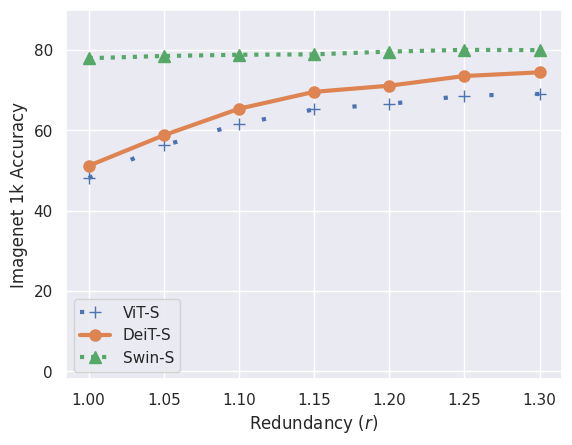

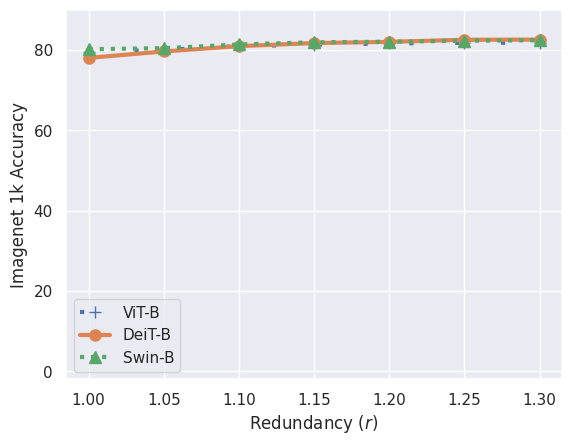

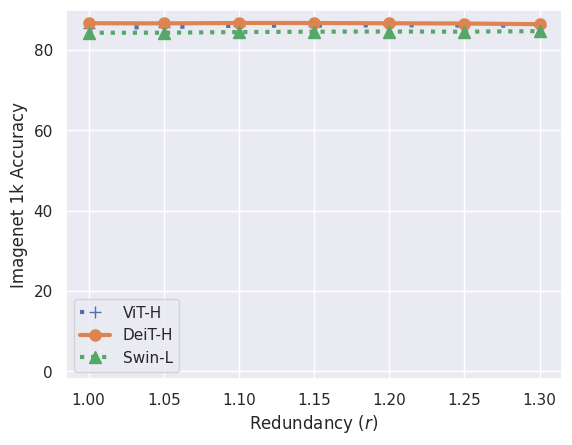

In [7]:
for _i,(k,v) in enumerate(smalls.items()):
    acc = [x for x in v]
    plt.plot(r, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(smalls.keys()))
plt.xlabel(r'Redundancy ($r$)')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('small_acc_vs_red.pdf', bbox_inches='tight')
plt.show()

for _i,(k,v) in enumerate(bases.items()):
    acc = [x for x in v]
    plt.plot(r, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(bases.keys()))
plt.xlabel(r'Redundancy ($r$)')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('small_acc_vs_red.pdf', bbox_inches='tight')
plt.show()

for _i,(k,v) in enumerate(larges.items()):
    acc = [x for x in v]
    plt.plot(r, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(larges.keys()))
plt.xlabel(r'Redundancy ($r$)')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('small_acc_vs_red.pdf', bbox_inches='tight')
plt.show()

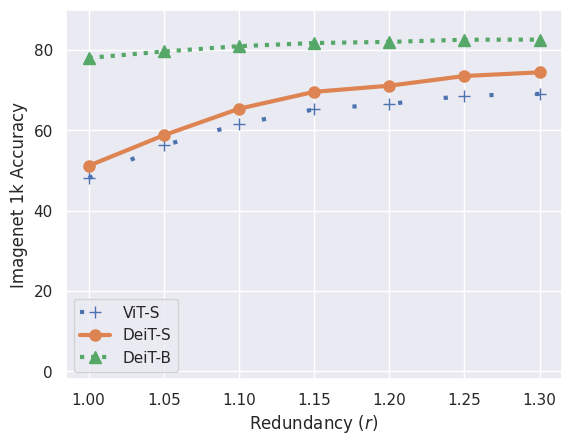

In [8]:
plt.plot(r, smalls['ViT-S'],marker=ls[0]['marker'], linestyle=ls[0]['ls'], linewidth=3, markersize=8)
plt.plot(r, smalls['DeiT-S'],marker=ls[1]['marker'], linestyle=ls[1]['ls'], linewidth=3, markersize=8)
plt.plot(r, bases['DeiT-B'],marker=ls[2]['marker'], linestyle=ls[2]['ls'], linewidth=3, markersize=8)
plt.legend(['ViT-S', 'DeiT-S', 'DeiT-B'])
plt.xlabel(r'Redundancy ($r$)')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('usefult_reds.pdf', bbox_inches='tight')
plt.show()

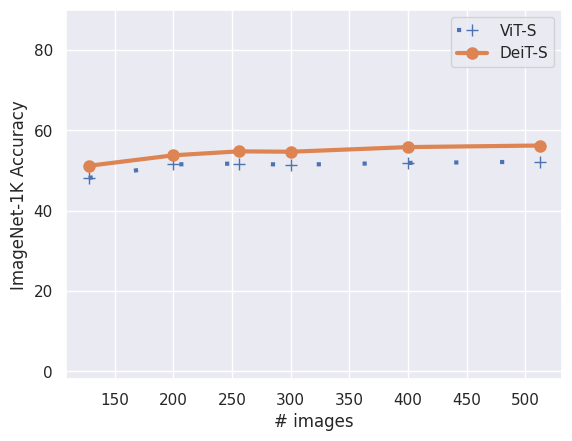

In [12]:
num_is = [128, 200, 256, 300, 400, 512]
accs = np.array([
[48.10, 51.13],
[51.48, 53.74],
[51.69, 54.73],
[51.40, 54.63],
[51.85, 55.79],
[52.16, 56.18]]).T

plt.plot(num_is, accs[0],marker=ls[0]['marker'], linestyle=ls[0]['ls'], linewidth=3, markersize=8)
plt.plot(num_is, accs[1],marker=ls[1]['marker'], linestyle=ls[1]['ls'], linewidth=3, markersize=8)
plt.legend(['ViT-S', 'DeiT-S'])
plt.xlabel(r'# images')
plt.ylabel('ImageNet-1K Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('num_cal_images.pdf', bbox_inches='tight')
plt.show()

In [13]:
sigs = [1.0, 1.5, 2.0, 2.5, 3.0]

smalls = {
            'ViT-S': [00.72, 38.38, 48.10, 14.21, 01.05],
            'DeiT-S': [01.64, 50.39, 51.13, 16.77, 01.28],
            'Swin-S': [01.18, 69.01, 77.91, 72.83, 58.46]
}

bases = {
            'ViT-B': [00.28, 65.72, 79.53, 76.88, 66.57],
            'DeiT-B': [07.19, 75.17, 77.99, 69.22, 44.59],
            'Swin-B': [06.09, 76.33, 80.16, 75.86, 60.20]
}

larges = {
            'ViT-H': [00.86, 81.96, 85.49, 84.20, 78.58],
            'DeiT-H': [32.84, 85.48, 86.62, 86.16, 85.34],
            'Swin-L': [03.00, 79.16, 84.25, 83.56, 81.30]
}

ls = {
    0: {'color': '#0000ff', 'marker': '+', 'ls': (0, (1, 10)), 'lw': 2, 'ms': 12},
    1: {'color': '#0000ff', 'marker': 'o', 'ls': 'solid', 'lw': 2, 'ms': 12},
	2: {'color': '#9198f6', 'marker': '^', 'ls': 'dotted', 'lw': 2, 'ms': 12}, 

}

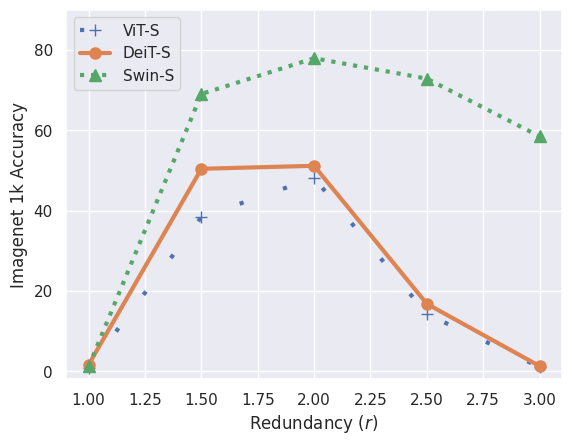

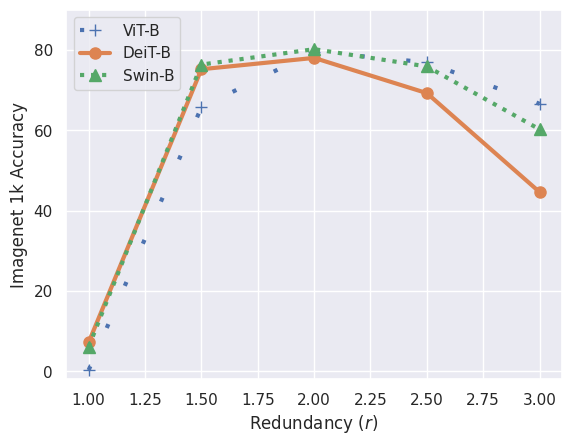

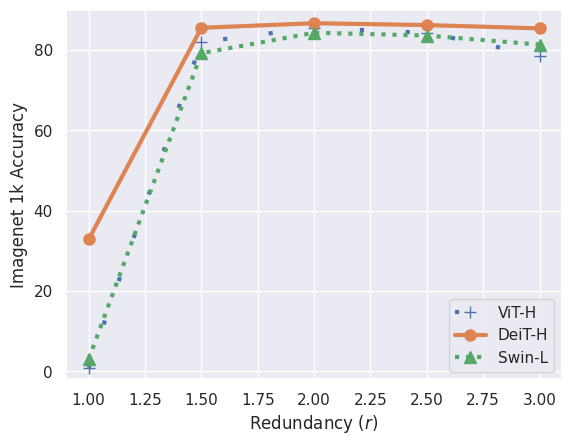

In [15]:
for _i,(k,v) in enumerate(smalls.items()):
    acc = [x for x in v]
    plt.plot(sigs, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(smalls.keys()))
plt.xlabel(r'Clipping Threshold $\times \sigma$')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('small_acc_vs_sig.pdf', bbox_inches='tight')
plt.show()

for _i,(k,v) in enumerate(bases.items()):
    acc = [x for x in v]
    plt.plot(sigs, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(bases.keys()))
plt.xlabel(r'Clipping Threshold $\times \sigma$')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('base_acc_vs_sig.pdf', bbox_inches='tight')
plt.show()

for _i,(k,v) in enumerate(larges.items()):
    acc = [x for x in v]
    plt.plot(sigs, acc,marker=ls[_i]['marker'], linestyle=ls[_i]['ls'], linewidth=3, markersize=8)
plt.legend(list(larges.keys()))
plt.xlabel(r'Clipping Threshold $\times \sigma$')
plt.ylabel('Imagenet 1k Accuracy')
ax = plt.gca()
ax.set_ylim([-2, 90])
plt.savefig('large_acc_vs_sig.pdf', bbox_inches='tight')
plt.show()